## Acquire process:

In [1]:
#import needed libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data


In [2]:
# acquire
from env import host, user, password
import acquire

In [3]:
# Create helper function to get the necessary connection url.

def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'


In [4]:
#acquire function
def get_telco_churn_data():
    '''
    This function reads in the iris data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    
    sql_query = '''
    SELECT *
    FROM customers
    JOIN contract_types ON customers.contract_type_id = contract_types.contract_type_id
    JOIN payment_types ON customers.payment_type_id = payment_types.payment_type_id
    JOIN internet_service_types ON customers.internet_service_type_id = internet_service_types.internet_service_type_id
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))

_________

## Prepare

In [5]:
#import prepare functions
import prepare

In [6]:
def prep_telco_churn(df):
    '''
    This function takes in the telco_churn df acquired by get_telco_churn_data
    Returns the telco_churn df.
    '''
    # drop duplicate columns from join
    df = df.loc[:, ~df.columns.duplicated()]
    
    # change data types
    df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    df.telco.replace({'churn': {'No':0, 'Yes':1}}, inplace=True)
    
    #drop duplicates
    df.drop_duplicates(inplace=True)

    #create dummies
    dummy_df = pd.get_dummies(df[['internet_service_type_id','contract_type_id']], dummy_na = False, drop_first=[True,True])
    #concat dummies with original df
    df= pd.concat([df, dummy_df], axis=1)

    return df

In [ ]:
#the following cells will be included in the prepare.py

In [8]:
#get rude of nulls - there are currently 11
#telco.is_null.sum()
#telco = telco.replace(' ', np.nan)
#telco.isnull().any()
#telco.dropna(inplace=True)

In [25]:
#change total charges from an object to a float- put that in PREPARE
telco.total_charges = telco.total_charges.str.replace(' ', '0').astype(float)

In [26]:
##need to convert churn to int
telco_change = telco.replace({'churn': {'No':0, 'Yes':1}}, inplace=True)
## ^can only run line once

In [27]:
#drop columns not needed
telco = telco.drop(['customer_id'], axis=1)

In [28]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,payment_type_id,payment_type,internet_service_type_id,internet_service_type
0,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,Yes,...,2,90.45,5957.90,0,3,Two year,2,Mailed check,1,DSL
1,Male,0,No,No,54,No,No phone service,1,Yes,No,...,4,45.20,2460.55,0,3,Two year,4,Credit card (automatic),1,DSL
2,Female,0,No,No,56,No,No phone service,1,Yes,Yes,...,3,45.05,2560.10,0,3,Two year,3,Bank transfer (automatic),1,DSL
3,Male,0,Yes,Yes,20,No,No phone service,1,Yes,No,...,4,39.40,825.40,0,3,Two year,4,Credit card (automatic),1,DSL
4,Male,0,Yes,No,72,Yes,Yes,1,No,Yes,...,3,85.15,6316.20,0,3,Two year,3,Bank transfer (automatic),1,DSL


_________________

## Explore the data

In [12]:
#rename data to 'telco'
telco = get_telco_churn_data()

In [13]:
#look at data
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,payment_type_id,payment_type,internet_service_type_id,internet_service_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,2,Mailed check,1,DSL
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,4,Credit card (automatic),1,DSL
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,3,Bank transfer (automatic),1,DSL
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,4,Credit card (automatic),1,DSL
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,3,Bank transfer (automatic),1,DSL


In [14]:
#this data appears to have no nulls
#data has int and object data types
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

### data summary:
- 18 object data types
- 8 integer data types
- 1 float data type
- 0 null values


In [15]:
#descriptive statistics
telco.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,payment_type_id,internet_service_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,2.315633,1.872923
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,1.148907,0.737796
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,3.000000,2.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,4.000000,3.000000


_______

### get curious about the data

In [16]:
#we are trying to determine churn... look into that
telco.churn.value_counts()

#this shows 26.54% of customers churn (1869 out of 7043)

No     5174
Yes    1869
Name: churn, dtype: int64

In [17]:
#find ou how many are senior citizens and how many are not
telco.senior_citizen.value_counts()

#this shows that 16.21% of all customers are seniors (1142 out of 7043)

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [18]:
#average tenure, max tenure, min tenure??
telco.tenure.mean(), telco.tenure.max(), telco.tenure.min()

(32.37114865824223, 72, 0)

In [19]:
#average monthly charges, max monthly charges, min monthly charges
telco.monthly_charges.mean(), telco.monthly_charges.max(), telco.monthly_charges.min()

(64.76169246059882, 118.75, 18.25)

In [20]:
#group by churn and senior_citizen 
#senior_churn= telco.groupby(['churn','senior_citizen'])

_________

In [21]:
#gettting value counts for churn as int not obj
(telco.churn == 'Yes').astype(int).value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [22]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,payment_type_id,payment_type,internet_service_type_id,internet_service_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,2,Mailed check,1,DSL
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,4,Credit card (automatic),1,DSL
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,3,Bank transfer (automatic),1,DSL
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,4,Credit card (automatic),1,DSL
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,3,Bank transfer (automatic),1,DSL


In [23]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,payment_type_id,payment_type,internet_service_type_id,internet_service_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,2,Mailed check,1,DSL
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,4,Credit card (automatic),1,DSL
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,3,Bank transfer (automatic),1,DSL
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,4,Credit card (automatic),1,DSL
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,3,Bank transfer (automatic),1,DSL


In [42]:
#show all column names for next steps of value count loop
telco.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id', 'contract_type',
       'payment_type_id', 'payment_type', 'internet_service_type_id',
       'internet_service_type'],
      dtype='object')

In [54]:
#identify columns for loop
columns = ['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id', 'contract_type',
       'payment_type_id', 'payment_type', 'internet_service_type_id',
       'internet_service_type']

In [53]:
#create for loop to print value counts / and percents
for col in columns:
    print(col)
    print(telco[col].value_counts())
    print('----------------------------------------')
    print(telco[col].value_counts(normalize=True))
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

gender
Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
senior_citizen
0    5901
1    1142
Name: senior_citizen, dtype: int64
----------------------------------------
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
partner
No     3641
Yes    3402
Name: partner, dtype: int64
----------------------------------------
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
----------------------------------------
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

ValueError: Grouper for 'internet_service_type_id' not 1-dimensional

### Data Prep

In [29]:
#find correlation- I think age correlates the most to churn
telco_correlation = telco.corr()
telco_correlation
#this shows that senior_citizen and monthly_charges have the highest pos corr with churn

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,payment_type_id,internet_service_type_id
senior_citizen,1.000000,0.016567,-0.032310,-0.142554,-0.093704,0.220173,0.103006,0.150889,-0.142554,-0.093704,-0.032310
tenure,0.016567,1.000000,-0.030359,0.671607,0.340305,0.247900,0.826178,-0.352229,0.671607,0.340305,-0.030359
internet_service_type_id,-0.032310,-0.030359,1.000000,0.099721,0.008124,-0.323260,-0.175755,-0.047291,0.099721,0.008124,1.000000
contract_type_id,-0.142554,0.671607,0.099721,1.000000,0.358913,-0.074195,0.446855,-0.396713,1.000000,0.358913,0.099721
payment_type_id,-0.093704,0.340305,0.008124,0.358913,1.000000,-0.074353,0.222398,-0.262818,0.358913,1.000000,0.008124
monthly_charges,0.220173,0.247900,-0.323260,-0.074195,-0.074353,1.000000,0.651174,0.193356,-0.074195,-0.074353,-0.323260
total_charges,0.103006,0.826178,-0.175755,0.446855,0.222398,0.651174,1.000000,-0.198324,0.446855,0.222398,-0.175755
churn,0.150889,-0.352229,-0.047291,-0.396713,-0.262818,0.193356,-0.198324,1.000000,-0.396713,-0.262818,-0.047291
contract_type_id,-0.142554,0.671607,0.099721,1.000000,0.358913,-0.074195,0.446855,-0.396713,1.000000,0.358913,0.099721
payment_type_id,-0.093704,0.340305,0.008124,0.358913,1.000000,-0.074353,0.222398,-0.262818,0.358913,1.000000,0.008124


In [30]:
#this gives the all the correlation with JUST churn
telco_corr_churn = telco_correlation['churn']
telco_corr_churn

## again, senior_citizen is the highest
##THIS will indict my DRIVER of churn!!

senior_citizen              0.150889
tenure                     -0.352229
internet_service_type_id   -0.047291
contract_type_id           -0.396713
payment_type_id            -0.262818
monthly_charges             0.193356
total_charges              -0.198324
churn                       1.000000
contract_type_id           -0.396713
payment_type_id            -0.262818
internet_service_type_id   -0.047291
Name: churn, dtype: float64

<AxesSubplot:xlabel='churn', ylabel='count'>

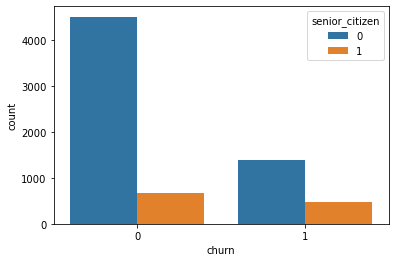

In [31]:
#this plot shows senior citizen (1) vs non-senior citizen (0)
## who churn (1) vs do not churn (0)
sns.countplot(x='churn', hue='senior_citizen', data=telco)

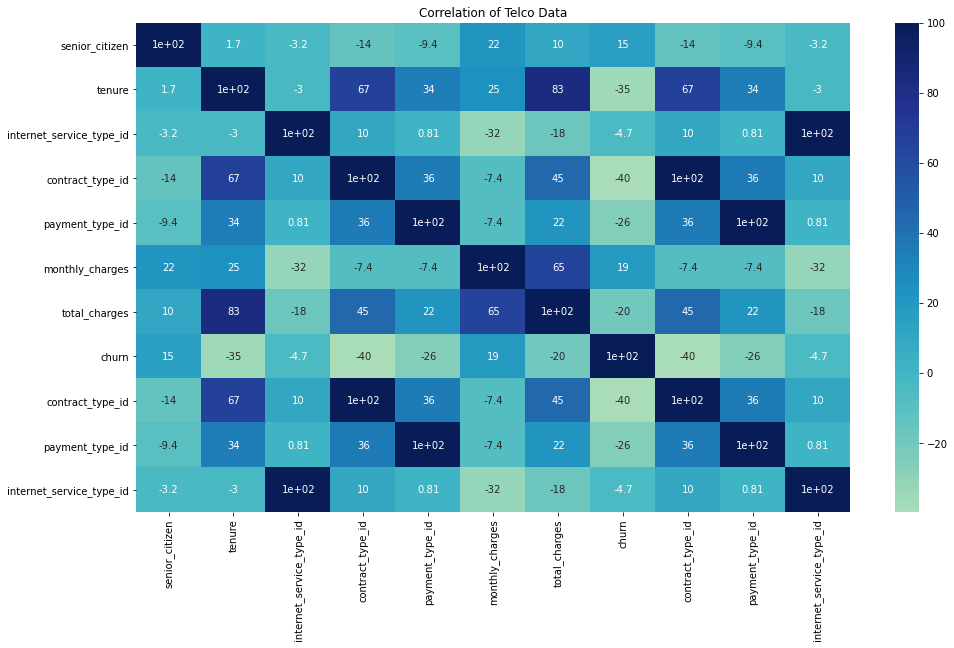

In [57]:
#heatmap to show correlation of all data
plt.figure(figsize=(16,9))

sns.heatmap((telco.corr()*100), cmap='YlGnBu', center=0, annot=True)

plt.title('Correlation of Telco Data')

plt.show()

_______

## Modeling/ Testing

### Find the appropriate model to use
- churn (categorical) and senior_citizen (categorical)
- 2 discrete variables
- use chi2 testing

In [34]:
#create confusion matrix
observed = pd.crosstab(telco.churn, telco.senior_citizen)
observed

senior_citizen,0,1
churn,,
0,4508,666
1,1393,476


## Hypothosis:

- **$H_{0}$**: there is no relationship between churn and customer age
<br>

- **$H_{a}$**: there is a relationshp between churn and customer age
<br>

- **True Positive**: Predict there is a relationship and there is a relationship
<br>

- **True Negative**:Predict there is no relationship and there is not relationship
<br>

- **False Positive**: Predict there is a relationship and there is no relationship
<br>

- **False Negative**: Predict there is no relationship and there is a relationship

In [35]:
#set alpha
alpha = 0.05

In [36]:
#chi2 contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf, expected

(159.42630036838742,
 1.510066805092378e-36,
 1,
 array([[4335.05239245,  838.94760755],
        [1565.94760755,  303.05239245]]))

In [37]:
## make it easier to read
print('Observed\n')
print(observed.values)
print('---------------------\nExpected\n')
print(expected.astype(int))
print('---------------------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[4508  666]
 [1393  476]]
---------------------
Expected

[[4335  838]
 [1565  303]]
---------------------

chi^2 = 159.4263
p     = 0.0000


In [38]:
if p< alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


### We reject $H_0$. Therefore, we believe that there is a relationship between churn and customer age

_________________________________

### Train Split

In [39]:
import prepare
import acquire

In [40]:
train, validate, test = prepare.prep_telco_churn(acquire.get_telco_churn_data())

AttributeError: 'DataFrame' object has no attribute 'telco'

In [ ]:
## Explore and graph with JUST train set

In [ ]:
## crosstab, confusion matrix

In [ ]:
pd.crosstab(train.churn, train.model5)